# DTSC-670 Final Project
## Name: Izaak Curry

## Overview

### Problem

We are attempting to predict a student’s final grade in a Portuguese school system, in order to identify students who might need additional assistance and intervention to improve their grade in the course.

### Framing the Problem

Given we already have labeled instances (the final G3 grades of students), our approach will be to use supervised learning. Supervised learning is when a model learns from labeled training data to make predictions on new, unseen data.

Our model will use batch learning. Batch learning is when the model is trained on the entire dataset at once. This method typically requires a large amount of computational resources, is done offline and is typically used when the dataset is small. Our dataset fits this method perfectly. 

Given we aim to predict a specific numeric value – in this case, the final grade for a student, we're using a regression model. This model could help us solve the business problem by allowing us to make a numeric prediction on a student’s final grade, based on the patterns observed in selected features (columns selected in the dataset to use in our model). 

### Big Picture

By choosing a regression model we can better measure the level of intervention and additional assistance a student may need by comparing the students predicted score with that of other students in an attempt to see which students need the most attention. In short, our goal is to improve overall student performance by using a model that predicts a student’s final grade to identify students who need additional assistance and interventions to improve their grade.

### Performance Metrics

We will be using the following metrics to measure the model’s overall performance:

Root Mean Square Error (RMSE): This metric measures the average magnitude of the errors between predicted and actual final grades. It gives more weight to large errors.

Mean Absolute Error (MAE): This metric measures the average absolute errors between predicted and actual final grades. It provides a straightforward understanding of the model's accuracy. Mean absolute error (MAE) weights all errors the same. It is calculated as the average of the absolute values of the errors, regardless of their size or magnitude.

R-Squared (R2): This metric assesses the proportion of the variance in the target or dependent variable (final G3 grade) that is predictable from the features (independent variables). It ranges from 0 to 1, where a value of 1 indicates a perfect fit, meaning that the entirety of the variance in the target variable can be explained by our model. A value of 0 means that none of the variability in our target variable can be explained by our model.


## Get the Data

### Import the Data

In [1]:
# Import standard libraries to use throughout notebook.
import pandas as pd
import numpy as np

# Import dataset from CSV file and assign to student_performance_data.
student_performance_data = pd.read_csv('student-mat.csv')

### Check Size of the data

In [2]:
# Get the shape of student_performance_data.
size = student_performance_data.shape

print(f"Size: {size[1]} columns & {size[0]} rows")

Size: 35 columns & 395 rows


### Missing Values and Data Types

The feature columns: age, absence_G1, absence_G2, and absence_G3 exhibit 12 missing values each. These are numeric float columns and represent the entirety of float-type columns within the dataset, accounting for a total of 4 float-type columns. There are 14 integer columns, which likely represent various numeric and/or ordinal data including our target attribute G3. Furthermore, the dataset has 17 object columns, suggesting the presence of categorical attributes like school, sex, and parental occupations (Mjob, Fjob).


In [3]:
# Get info of student_performance_data
student_performance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   school       395 non-null    object 
 1   sex          395 non-null    object 
 2   age          383 non-null    float64
 3   address      395 non-null    object 
 4   famsize      395 non-null    object 
 5   Pstatus      395 non-null    object 
 6   Medu         395 non-null    int64  
 7   Fedu         395 non-null    int64  
 8   Mjob         395 non-null    object 
 9   Fjob         395 non-null    object 
 10  reason       395 non-null    object 
 11  guardian     395 non-null    object 
 12  traveltime   395 non-null    int64  
 13  studytime    395 non-null    int64  
 14  failures     395 non-null    int64  
 15  schoolsup    395 non-null    object 
 16  famsup       395 non-null    object 
 17  paid         395 non-null    object 
 18  activities   395 non-null    object 
 19  nursery 

### List of Features and Definitions

In machine learning, features or independent variables are the details about the data that a model uses to make predictions—for example using the number of bedrooms or location of a house when predicting a home’s value. They're the building blocks for the model's decision making and greatly affect the model's ability to make predictions.

- school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
- sex - student's sex (binary: "F" - female or "M" - male)
- age - student's age (numeric: from 15 to 22)
- address - student's home address type (binary: "U" - urban or "R" - rural)
- famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
- Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)
- Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
- Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
- Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
- Fjob - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
- reason - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")
- guardian - student's guardian (nominal: "mother", "father" or "other")
- traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
- studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
- failures - number of past class failures (numeric: n if 1<=n<3, else 4)
- schoolsup - extra educational support (binary: yes or no)
- famsup - family educational support (binary: yes or no)
- paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
- activities - extra-curricular activities (binary: yes or no)
- nursery - attended nursery school (binary: yes or no)
- higher - wants to take higher education (binary: yes or no)
- internet - Internet access at home (binary: yes or no)
- romantic - with a romantic relationship (binary: yes or no)
- famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
- freetime - free time after school (numeric: from 1 - very low to 5 - very high)
- goout - going out with friends (numeric: from 1 - very low to 5 - very high)
- Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
- Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
- health - current health status (numeric: from 1 - very bad to 5 - very good)
- absences_G1 - number of school absences for G1 term (numeric)
- absences_G2 - number of school absences for G2 term (numeric)
- absences_G3 - number of school absences for G3 term (numeric)
- G1 - first term grade (numeric: from 0 to 20)
- G2 - second term grade (numeric: from 0 to 20)

### Target and Definition

In machine learning, the target or dependent variable is what you are attempting to predict. 

-  G3 - final grade (numeric: from 0 to 20)


### Split Data into Train and Test Sets

Splitting data into training and testing sets allows us to evaluate the machine learning models on unseen data and helps to detect overfitting and assess performance. This helps with tuning model parameters and ensures a more accurate assessment of a model's real-world performance.

In [4]:
# Import train_test_split from sklearn.
from sklearn.model_selection import train_test_split

# Seperate Features (X) and Target (y) columns into seperate datasets.
X = student_performance_data.drop(columns='G3').copy()
y = student_performance_data['G3']

# Split X (Features) and y (Target) datasets into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, test_size=.2, random_state=42)

## Explore the Data

### Study Attributes & their Characteristics

In [5]:
# Create a DataFrame copy of the training features and target columns concatenated called training_data_copy.
training_data_copy = pd.concat([X_train, y_train], axis=1).copy()

In [6]:
# Use head method to review the first 17 columns and first 5 rows of the training dataset.
training_data_copy.iloc[:,:17].head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup
181,GP,M,16.0,U,GT3,T,3,3,services,other,home,mother,1,2,0,no,no
194,GP,M,16.0,U,GT3,T,2,3,other,other,home,father,2,1,0,no,no
173,GP,F,16.0,U,GT3,T,1,3,at_home,services,home,mother,1,2,3,no,no
63,GP,F,16.0,U,GT3,T,4,3,teacher,health,home,mother,1,3,0,yes,yes
253,GP,M,16.0,R,GT3,T,2,1,other,other,course,mother,2,1,0,no,no


In [7]:
# Use head method to review the last 17 columns and first 5 rows of the training dataset.
training_data_copy.iloc[:,17:].head()

,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences_G1,absences_G2,absences_G3,G1,G2,G3
181,yes,yes,yes,yes,yes,yes,4,2,3,1,2,3,0.0,0.0,2.0,12,13,12
194,no,no,yes,yes,yes,no,5,3,3,1,1,3,0.0,0.0,0.0,13,14,14
173,no,yes,no,yes,yes,yes,4,3,5,1,1,3,0.0,0.0,0.0,8,7,0
63,yes,yes,yes,yes,yes,no,3,4,4,2,4,4,0.0,0.0,2.0,10,9,9
253,no,yes,no,yes,no,no,3,3,2,1,3,3,0.0,0.0,0.0,8,9,8


The describe method below indicates that absences_G1 and absences_G2 are right skewed with more than 75% of the training data falling under 1 absence with a max absences of 12. The feature absences_G3 seems to be slightly less right skewed with 75% of instances falling under 6, but a max absences of 51. 

In [8]:
# Displaying descriptive statistics for the training dataset using describe method.
training_data_copy.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences_G1,absences_G2,absences_G3,G1,G2,G3
count,305.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,305.000000,305.000000,305.000000,316.000000,316.000000,316.000000
mean,16.747541,2.734177,2.544304,1.430380,2.047468,0.335443,3.943038,3.218354,3.161392,1.500000,2.344937,3.518987,0.704918,0.704918,4.488525,10.933544,10.651899,10.325949
std,1.274188,1.080375,1.078476,0.688842,0.836258,0.735588,0.885464,1.020323,1.119480,0.903257,1.296395,1.410714,1.373435,1.373435,5.824238,3.216823,3.755930,4.590337
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,0.000000,0.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,1.000000,1.000000,6.000000,13.000000,13.000000,13.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,12.000000,12.000000,51.000000,19.000000,19.000000,20.000000


In [9]:
# Look at Final G3 Grades that are 0 for potential outliers in the data.
training_data_copy[training_data_copy['G3'] == 0]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences_G1,absences_G2,absences_G3,G1,G2,G3
173,GP,F,16.0,U,GT3,T,1,3,at_home,services,...,5,1,1,3,0.0,0.0,0.0,8,7,0
383,MS,M,19.0,R,GT3,T,1,1,other,services,...,2,1,3,5,0.0,0.0,0.0,6,5,0
131,GP,F,15.0,U,GT3,T,1,1,at_home,other,...,3,1,2,4,0.0,0.0,0.0,8,0,0
367,MS,F,17.0,R,GT3,T,1,1,other,services,...,1,1,2,1,0.0,0.0,0.0,7,6,0
296,GP,F,19.0,U,GT3,T,4,4,health,other,...,4,2,3,2,0.0,0.0,0.0,10,9,0
239,GP,M,18.0,U,GT3,T,2,2,other,services,...,4,3,5,2,0.0,0.0,0.0,7,7,0
153,GP,M,19.0,U,GT3,T,3,2,services,at_home,...,4,1,1,4,0.0,0.0,0.0,5,0,0
389,MS,F,18.0,U,GT3,T,1,1,other,other,...,1,1,1,5,0.0,0.0,0.0,6,5,0
148,GP,M,16.0,U,GT3,T,4,4,teacher,teacher,...,2,2,1,5,0.0,0.0,0.0,7,6,0
150,GP,M,18.0,U,LE3,T,1,1,other,other,...,5,2,5,4,0.0,0.0,0.0,6,5,0


In [10]:
# Create list of numeric columns and categorical columns to use for exploration.
num_columns = training_data_copy.select_dtypes(include=['number']).columns.tolist()
cat_columns = training_data_copy.select_dtypes(exclude=['number']).columns.tolist()

In [11]:
# Get percent of data represented in each categorical column in the training data.
for col in X_train[cat_columns]:
    percentages = X_train[col].value_counts() / len(X_train[col])
    result_str = f"Column: {col}\n{percentages}\n" + "="*30
    print(result_str)

Column: school
GP    0.892405
MS    0.107595
Name: school, dtype: float64
Column: sex
F    0.537975
M    0.462025
Name: sex, dtype: float64
Column: address
U    0.781646
R    0.218354
Name: address, dtype: float64
Column: famsize
GT3    0.71519
LE3    0.28481
Name: famsize, dtype: float64
Column: Pstatus
T    0.898734
A    0.101266
Name: Pstatus, dtype: float64
Column: Mjob
other       0.348101
services    0.265823
at_home     0.161392
teacher     0.139241
health      0.085443
Name: Mjob, dtype: float64
Column: Fjob
other       0.563291
services    0.262658
teacher     0.066456
at_home     0.056962
health      0.050633
Name: Fjob, dtype: float64
Column: reason
course        0.370253
home          0.265823
reputation    0.262658
other         0.101266
Name: reason, dtype: float64
Column: guardian
mother    0.693038
father    0.221519
other     0.085443
Name: guardian, dtype: float64
Column: schoolsup
no     0.860759
yes    0.139241
Name: schoolsup, dtype: float64
Column: famsup
yes    0

In [12]:
# Look at all 3 grades and the failures columns.
training_data_copy[training_data_copy['G3'] < 10][['G1', 'G2','G3' , 'failures']]

,G1,G2,G3,failures
173,8,7,0,3
63,10,9,9,0
253,8,9,8,0
225,9,8,7,1
383,6,5,0,1
...,...,...,...,...
330,9,8,8,0
394,8,9,9,0
188,8,7,9,0
106,7,8,8,0


### Explore Data using Visualizations

Visualizing the distribution of numerical features in the training data. This is also in attempt to spot outliers in the data. 

In the plot below, feature 'G2' and target 'G3' seem to have a large gap between the large number of students who scored a 0 and the next lowest scoring group of students, which appear to score in the 4 to 5 range. This will be kept in mind for further analysis as a possible outlier problem.

Aside from the possible outliers, our target attribute (G3) seems to be normally distributed. Very similar to that of feature columns G1 and G2.

The absence_G1, absence_G2, and absence_G3 columns are all visually right skewed as we noted using the describe method above. After visualization there is a possability that the absences towards the farthest right of the skew may be outliers and should be looked at further.

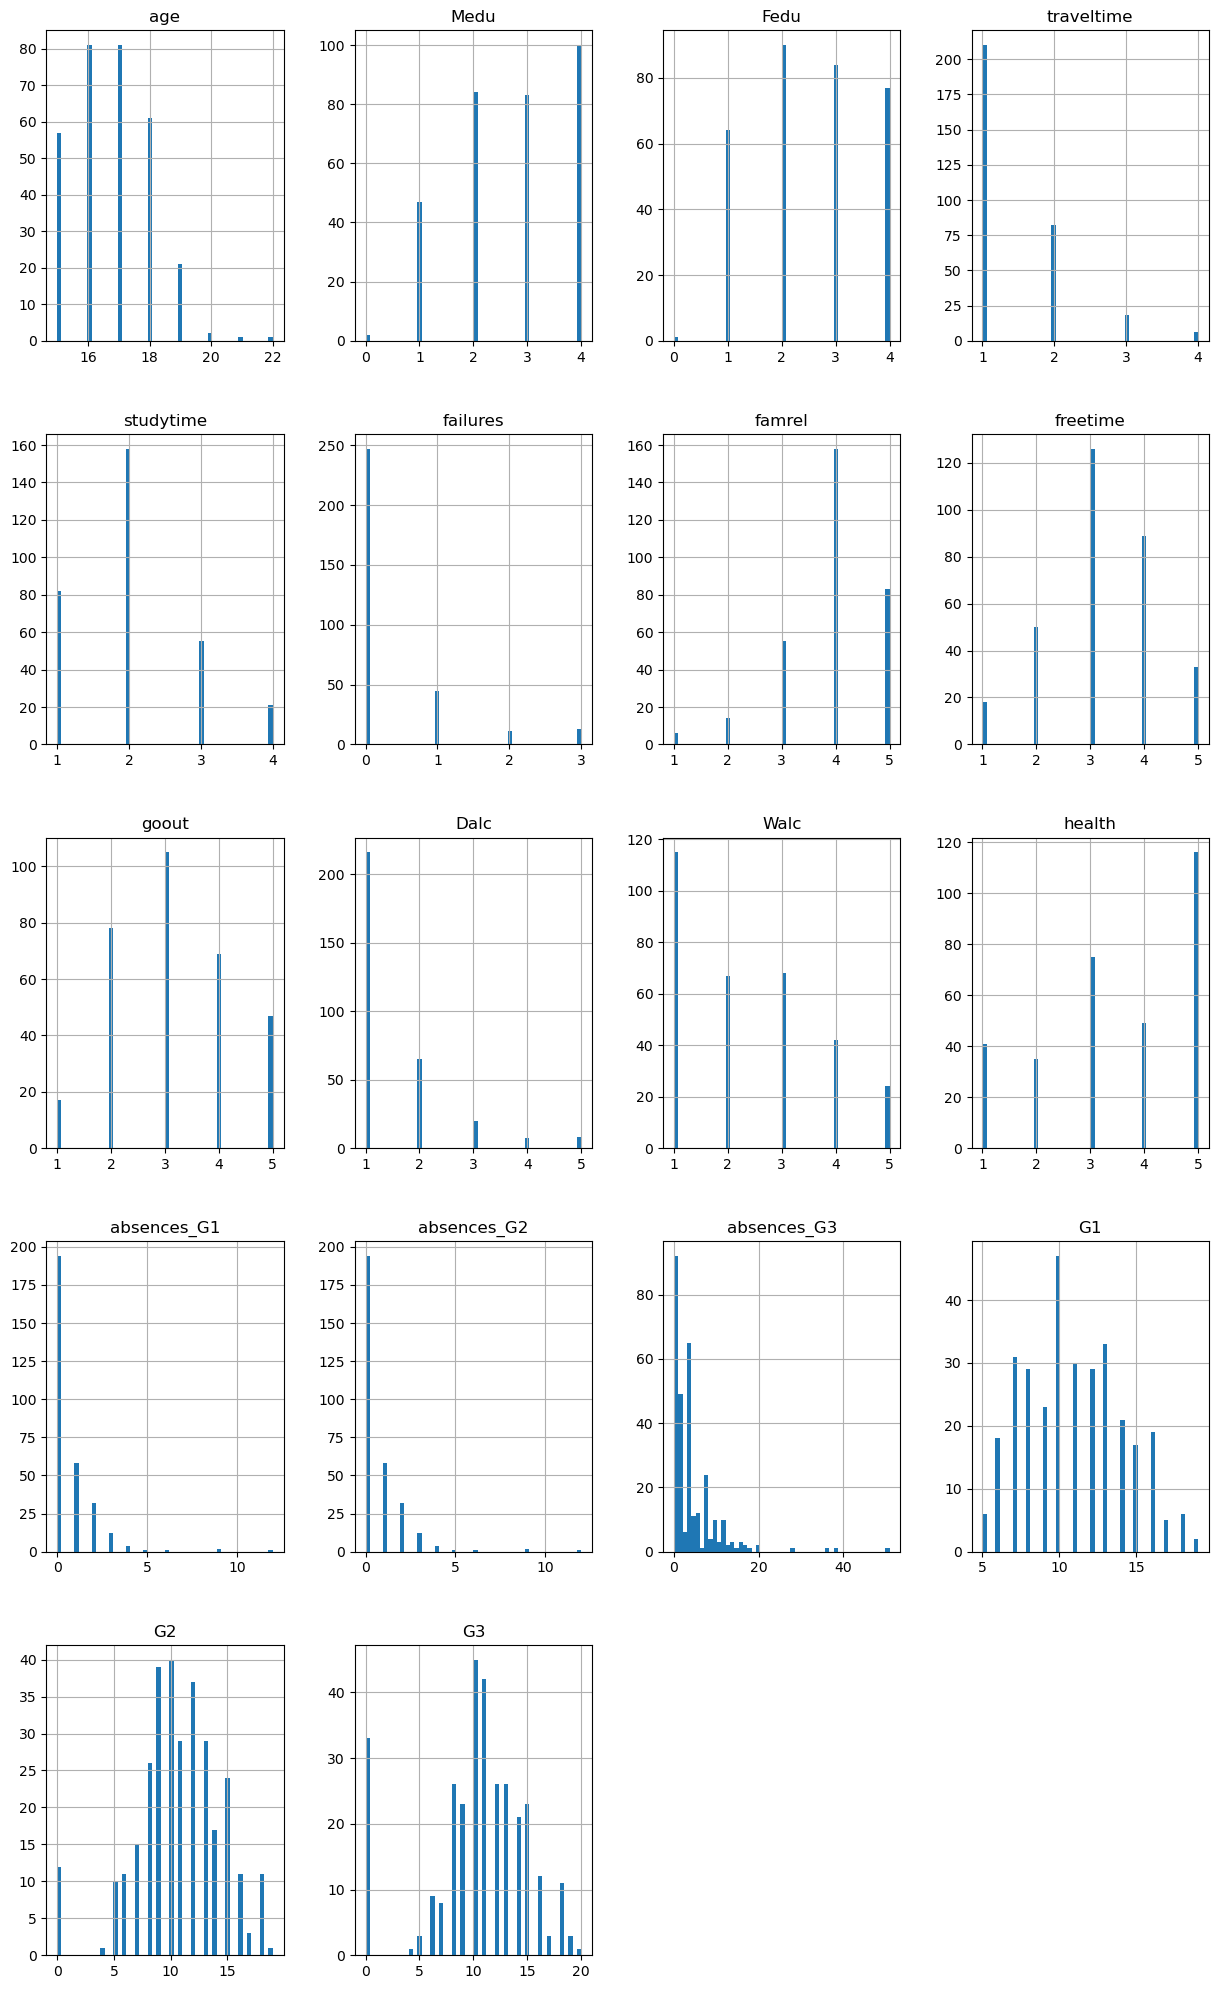

In [13]:
import matplotlib.pyplot as plt

# Create a histogram for each numerical attribute.
training_data_copy[num_columns].hist(bins=50, figsize=(15,25))
plt.show()

In [14]:
training_data_copy

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences_G1,absences_G2,absences_G3,G1,G2,G3
181,GP,M,16.0,U,GT3,T,3,3,services,other,...,3,1,2,3,0.0,0.0,2.0,12,13,12
194,GP,M,16.0,U,GT3,T,2,3,other,other,...,3,1,1,3,0.0,0.0,0.0,13,14,14
173,GP,F,16.0,U,GT3,T,1,3,at_home,services,...,5,1,1,3,0.0,0.0,0.0,8,7,0
63,GP,F,16.0,U,GT3,T,4,3,teacher,health,...,4,2,4,4,0.0,0.0,2.0,10,9,9
253,GP,M,16.0,R,GT3,T,2,1,other,other,...,2,1,3,3,0.0,0.0,0.0,8,9,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,GP,M,15.0,U,GT3,T,4,2,other,other,...,3,1,1,3,0.0,0.0,0.0,10,10,10
106,GP,F,15.0,U,GT3,T,2,2,other,other,...,2,1,1,3,NaN,NaN,NaN,7,8,8
270,GP,F,19.0,U,GT3,T,3,3,other,services,...,5,3,3,5,2.0,2.0,11.0,9,9,9
348,GP,F,17.0,U,GT3,T,4,3,health,other,...,3,1,3,4,0.0,0.0,0.0,13,15,15


The visualization below shows a strong negative correlation between average number of failures and final grade (G3), suggesting that students with more failures tend to have significantly lower final grades. This indicates a strong relationship where failures likely reflect lower final grades. 

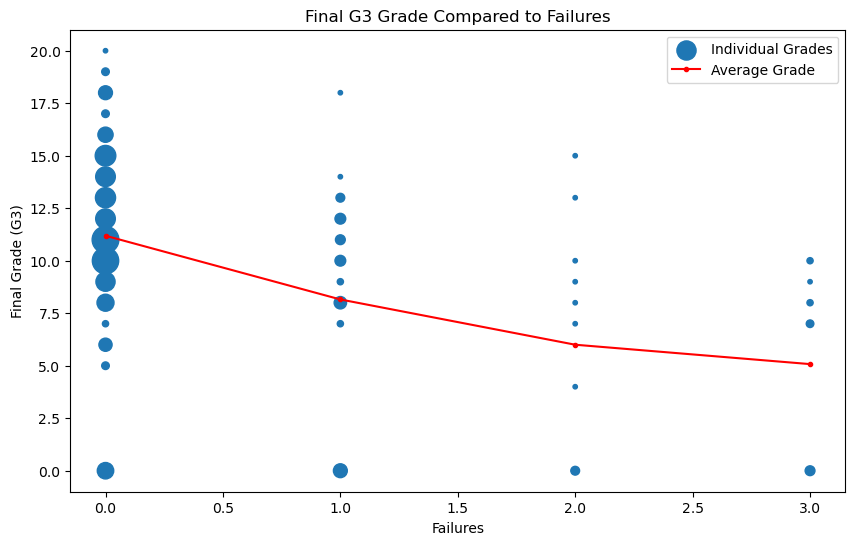

In [15]:
import matplotlib.pyplot as plt

# Assuming 'failures' is a column in training_data_copy
failures = training_data_copy['failures']
grades_failures = training_data_copy.groupby('failures')['G3'].value_counts().reset_index(name='count')
average_grades = training_data_copy.groupby('failures')['G3'].mean().reset_index()

# Figure size
fig = plt.figure(figsize=[10, 6])

# Scatter plot
plt.scatter(grades_failures['failures'], grades_failures['G3'], label='Individual Grades', s=grades_failures['count']*10)

# Plotting the average grades
plt.plot(average_grades['failures'], average_grades['G3'], color='red', linestyle='-', marker='o', markersize=3,
         label='Average Grade')

plt.xlabel('Failures')
plt.ylabel('Final Grade (G3)')
plt.title('Final G3 Grade Compared to Failures')
plt.legend()

# Show the plot
plt.show()

Although the chart below shows a positive correlation between study time and average final grade (G3), the correlation is relatively weak, suggesting that increasing study time alone may not significantly improve final grades. An increase from category 1 - "less than 2 hours" to category 4 - "more than 10 hours", only increased the average final grade by less than 2.5 points. The scaling method of the scatter points used does indicate the possibility of 0 scores as outliers.

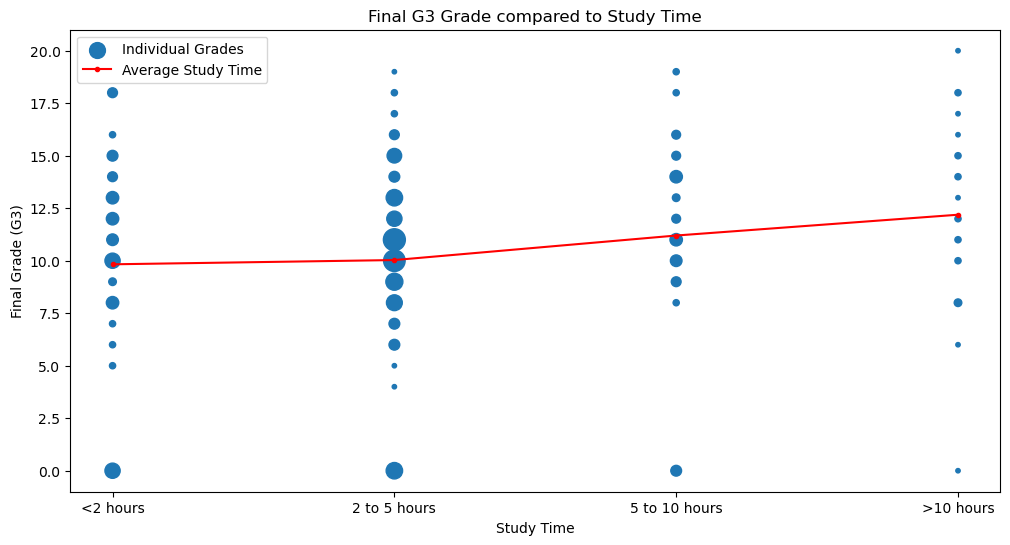

In [16]:
map_studytime = { 
    1 :'<2 hours', 
    2 : '2 to 5 hours', 
    3 : '5 to 10 hours',
    4 : '>10 hours'
}

# Get count of final grades by studytime category.
studytime_grades = training_data_copy.groupby('studytime')['G3'].value_counts().reset_index(name='count')

# Get average final grade for each category of studytime.
average_study_time = training_data_copy.groupby('studytime')['G3'].mean().reset_index()

# Figure size
fig = plt.figure(figsize=[12, 6])

# Scatter plot of students final grades with point scaling.
plt.scatter(studytime_grades['studytime'],studytime_grades['G3'] , label='Individual Grades',
            s=studytime_grades['count']*10,)

# Plotting the average grades.
plt.plot(average_study_time['studytime'], average_study_time['G3'], color='red', linestyle='-', 
         marker='o', markersize=3, label='Average Study Time')

plt.xlabel('Study Time')
plt.ylabel('Final Grade (G3)')
plt.title('Final G3 Grade compared to Study Time')
plt.legend(loc='upper left')

# Map study time hour labels.
plt.xticks(list(map_studytime.keys()), map_studytime.values())

# Show the plot.
plt.show()

In [17]:
# Averages for final grades by study time.
average_study_time.rename(columns={'studytime': 'Study Time', 'G3': 'Average Grade (G3)'})

,Study Time,Average Grade (G3)
0,1,9.829268
1,2,10.031646
2,3,11.200000
3,4,12.190476


Using the scatter matrix below we see a variety of different combinations in graphs. 

The absencesG1, absences_G2, and absences_G3 charts seem to reflect similar stories as we have seen already. A majority of the instances tend to be close to 0 and spread further out with less instances as the number of absences grow. The instances of absences we had identified as possible outliers earlier seem to follow what we would expect for final grades. We will not decide to exclude these instances from the data, and will instead see if aggregating the absences columns will help us better understand the data.

array([[<Axes: xlabel='failures', ylabel='failures'>,
        <Axes: xlabel='famrel', ylabel='failures'>,
        <Axes: xlabel='absences_G1', ylabel='failures'>,
        <Axes: xlabel='absences_G2', ylabel='failures'>,
        <Axes: xlabel='absences_G3', ylabel='failures'>,
        <Axes: xlabel='G1', ylabel='failures'>,
        <Axes: xlabel='G2', ylabel='failures'>,
        <Axes: xlabel='G3', ylabel='failures'>],
       [<Axes: xlabel='failures', ylabel='famrel'>,
        <Axes: xlabel='famrel', ylabel='famrel'>,
        <Axes: xlabel='absences_G1', ylabel='famrel'>,
        <Axes: xlabel='absences_G2', ylabel='famrel'>,
        <Axes: xlabel='absences_G3', ylabel='famrel'>,
        <Axes: xlabel='G1', ylabel='famrel'>,
        <Axes: xlabel='G2', ylabel='famrel'>,
        <Axes: xlabel='G3', ylabel='famrel'>],
       [<Axes: xlabel='failures', ylabel='absences_G1'>,
        <Axes: xlabel='famrel', ylabel='absences_G1'>,
        <Axes: xlabel='absences_G1', ylabel='absences_G1'>,


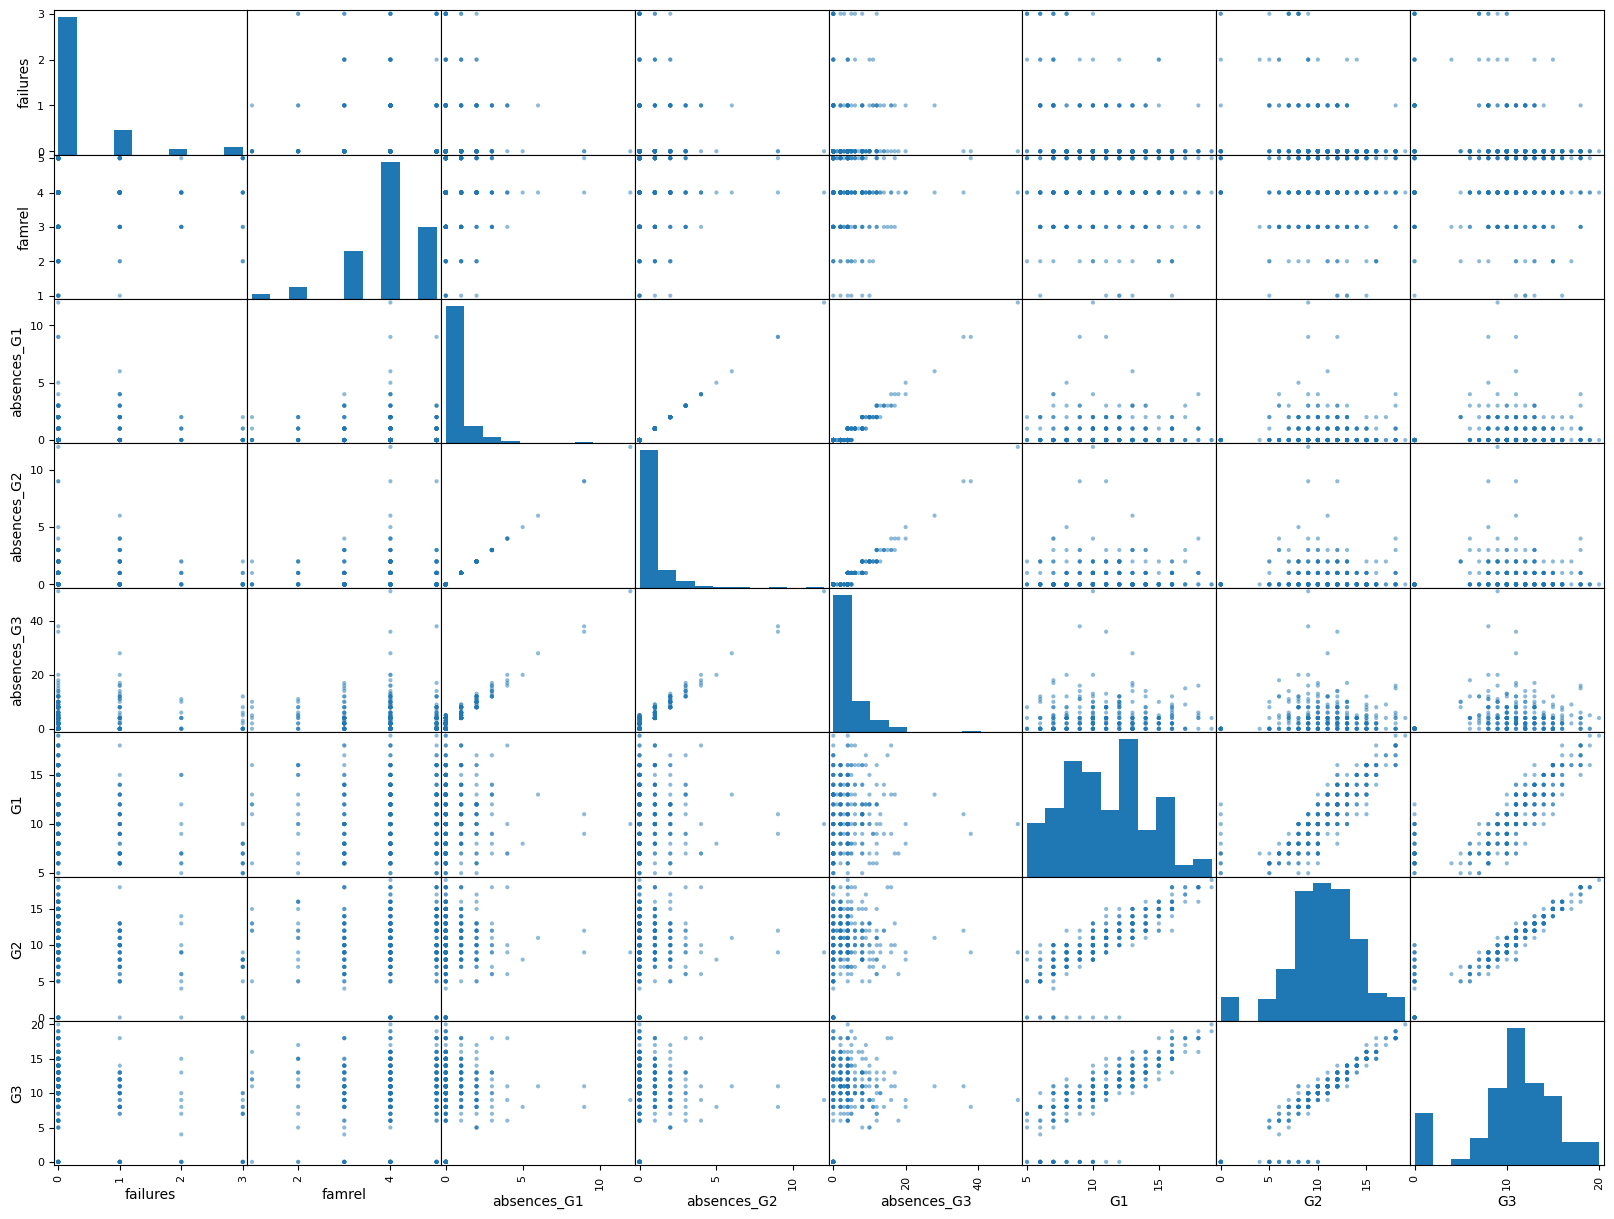

In [18]:
from pandas.plotting import scatter_matrix


# Columns used for scatter matrix.
matrix_attributes = ['failures', 'famrel', 'absences_G1', 'absences_G2', 'absences_G3', 'G1', 'G2', 'G3']

# Create scatter matrix.
scatter_matrix(training_data_copy[matrix_attributes], figsize=(20, 15))


Visualizing the final G3 grade against total absences reveals a negative correlation, with increasing absences corresponding to lower grades. For students with 0 to 10 absences, the final G3 grades exhibit a wider range, spanning from 0 to 20. This suggests that below 10 absences, factors beyond absences play a more significant role in determining final G3 grade.  However, once absences exceed 10, a sharp decline in the highest achievable final grade becomes apparent. This indicates a threshold beyond which frequent absences limit academic success and makes 'total_absences' a good feature to consider during feature selection.

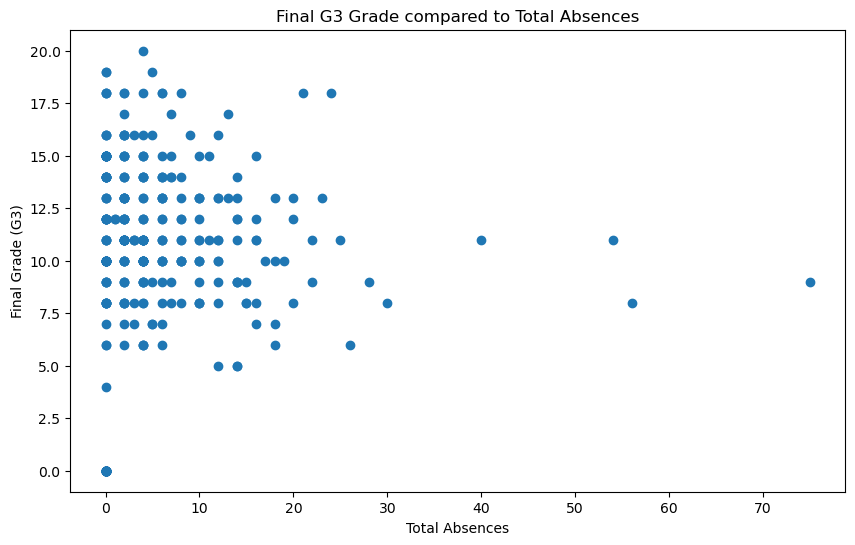

In [19]:
# Figure size
fig = plt.figure(figsize=[10, 6])

# Get the total absences for G1, G2, and G3
total_absences = X_train[['absences_G1', 'absences_G2', 'absences_G3']].sum(axis=1).copy()

plt.scatter(total_absences, y_train)
plt.xlabel('Total Absences')
plt.ylabel('Final Grade (G3)')
plt.title('Final G3 Grade compared to Total Absences')

# Show the plot
plt.show()

The chart has a positive correlation between highest parental education and final G3 grade, with students having at least one parent with higher levels of education tending to have higher final G3 grades. This relationship likely arises from factors such as parents with higher levels of education providing more educational resources and support to the student.

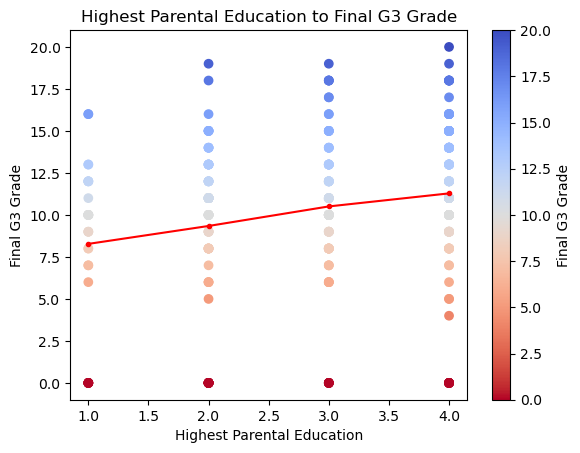

In [20]:
training_data_copy['highest_parents_education'] = training_data_copy[['Medu', 'Fedu']].max(axis=1)

average_total_parent_edu = training_data_copy.groupby('highest_parents_education')['G3'].mean().reset_index()

# Scatter plot with color-coded points
scatter = plt.scatter(training_data_copy['highest_parents_education'], training_data_copy['G3'],
                      c=training_data_copy['G3'], cmap='coolwarm_r')

plt.plot(average_total_parent_edu['highest_parents_education'], average_total_parent_edu['G3'], color='red',
         linestyle='-', marker='o', markersize=3, label='Average Study Time')

# Add colorbar
plt.colorbar(scatter, label='Final G3 Grade')

# Add labels and title
plt.xlabel('Highest Parental Education')
plt.ylabel('Final G3 Grade')
plt.title('Highest Parental Education to Final G3 Grade')

# Show the plot
plt.show()


Students who choose schools based on school "reputation" seem to be achieving higher grades than students who choose schools based on other factors, such as: close to home, course preference, or other. However, there is not an obvious difference overall in the median or range of each category.

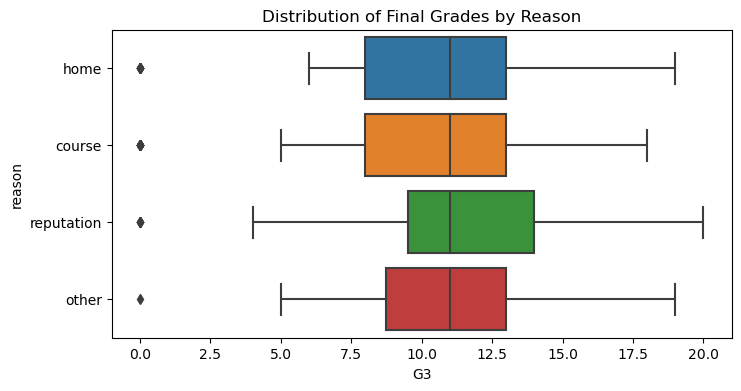

In [21]:
import seaborn as sns

# Set figure size.
plt.figure(figsize=(8, 4))

#create box plot.
sns.boxplot(x='G3', y='reason', data=training_data_copy)
plt.title('Distribution of Final Grades by Reason')

# Show boxplot.
plt.show()

This chart below reveals an association between a parent’s educational level and student’s final grade (G3). In all four reason categories, students with a higher-educated parent consistently achieve higher average G3 scores. Additionally, students who chose their school based on reputation demonstrate consistently higher average G3 scores compared to those who chose their school for other reasons. These features seem to work well together to predict a student’s final G3 grade.

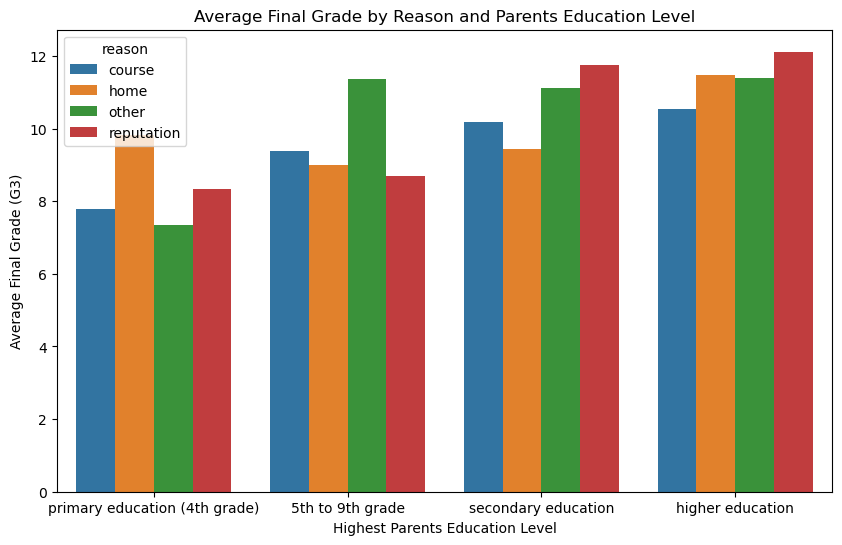

In [22]:
map_edu = {
    0 : 'none', 
    1 : 'primary education (4th grade)', 
    2 : '5th to 9th grade', 
    3 : 'secondary education',
    4 : 'higher education'
}
# Average grades for students by highets parent eduction and
avg_grades_reason = training_data_copy.groupby(['highest_parents_education', 'reason'])['G3'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_grades_reason['highest_parents_education'].map(map_edu), y='G3', hue='reason', data=avg_grades_reason)

# Add labels and title
plt.xlabel('Highest Parents Education Level')
plt.ylabel('Average Final Grade (G3)')
plt.title('Average Final Grade by Reason and Parents Education Level')

# Show the plot
plt.show()

The chart doesn't seem to suggests that a higher percentage of students whose parents are living together are achieving higher final G3 grades when compared to the students whose parents are living apart.

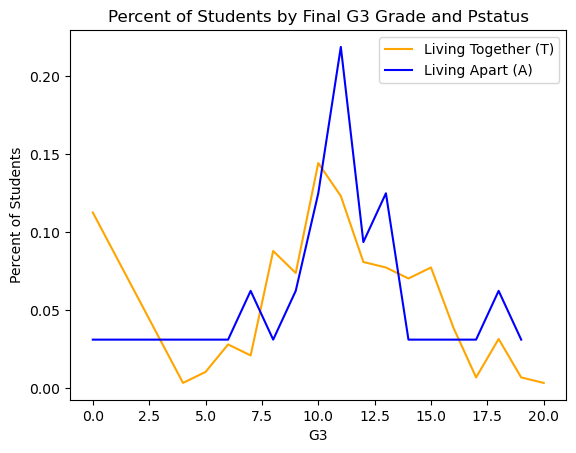

In [23]:

# Assuming 'G3' and 'Pstatus' are columns in your DataFrame
group_pstatus_counts = training_data_copy.groupby(['G3', 'Pstatus']).size().reset_index(name='Count')
group_pstatus_counts = pd.DataFrame(group_pstatus_counts)

# Separate data for 'T' and 'A'
df_T = group_pstatus_counts[group_pstatus_counts['Pstatus'] == 'T'].copy()
df_A = group_pstatus_counts[group_pstatus_counts['Pstatus'] == 'A'].copy()

# Calculate percentages for 'T'
df_T.loc[:, 'percent'] = df_T['Count'] / df_T['Count'].sum()

# Calculate percentages for 'A'
df_A.loc[:, 'percent'] = df_A['Count'] / df_A['Count'].sum()

# Plotting the graph
plt.plot(df_T['G3'], df_T['percent'], label='Living Together (T)', color='orange')
plt.plot(df_A['G3'], df_A['percent'], label='Living Apart (A)', color='blue')

# Adding labels and title
plt.xlabel('G3')
plt.ylabel('Percent of Students')
plt.title('Percent of Students by Final G3 Grade and Pstatus')
plt.legend()

# Show the plot
plt.show()

The chart doesn't seem to suggests that there is a large difference between the percentage of students who attend Mousinho da Silveira (MS) when compared to students who attend Gabriel Pereira (GP) when looking at their final 'G3' grades.

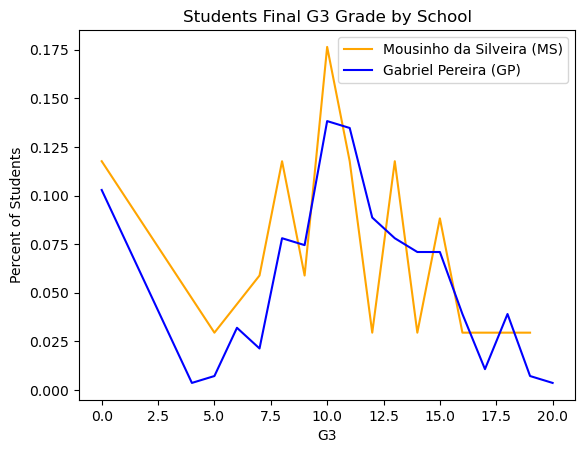

In [24]:
# Group columns by 'G3' and 'school' 
group_pstatus_counts = training_data_copy.groupby(['G3', 'school']).size().reset_index(name='Count')
group_pstatus_counts = pd.DataFrame(group_pstatus_counts)

# Separate data for 'T' and 'A'
df_T = group_pstatus_counts[group_pstatus_counts['school'] == 'MS'].copy()
df_A = group_pstatus_counts[group_pstatus_counts['school'] == 'GP'].copy()

# Calculate percentages for 'MS'
df_T.loc[:, 'percent'] = df_T['Count'] / df_T['Count'].sum()

# Calculate percentages for 'GP'
df_A.loc[:, 'percent'] = df_A['Count'] / df_A['Count'].sum()


# Plotting the graph
plt.plot(df_T['G3'], df_T['percent'], label='Mousinho da Silveira (MS)', color='orange')
plt.plot(df_A['G3'], df_A['percent'], label='Gabriel Pereira (GP)', color='blue')

# Adding labels and title
plt.xlabel('G3')
plt.ylabel('Percent of Students')
plt.title('Students Final G3 Grade by School')
plt.legend()

# Show the plot
plt.show()

### Correlation Study

Analyzing the correlations between discrete and continuous numerical attributes:


In [25]:
# Compute correlations with a correlation matrix.
corr_matrix = training_data_copy[num_columns].corr()
corr_matrix

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences_G1,absences_G2,absences_G3,G1,G2,G3
age,1.000000,-0.172035,-0.195360,0.014211,0.028938,0.237423,0.029536,0.000450,0.075913,0.105923,0.076030,-0.070152,0.140406,0.140406,0.172297,-0.025149,-0.103116,-0.134519
Medu,-0.172035,1.000000,0.615004,-0.178514,0.056176,-0.246962,-0.025834,0.018264,0.103830,0.032531,-0.004591,-0.055000,0.086274,0.086274,0.091383,0.214130,0.209480,0.215968
Fedu,-0.195360,0.615004,1.000000,-0.171039,-0.021699,-0.262897,-0.030593,-0.018917,0.055851,0.006518,0.001523,0.005705,0.021087,0.021087,0.008273,0.185237,0.148808,0.135265
traveltime,0.014211,-0.178514,-0.171039,1.000000,-0.129264,0.090092,0.055934,-0.003145,0.041376,0.132658,0.135403,0.060168,0.014724,0.014724,-0.008156,-0.078742,-0.151731,-0.106752
studytime,0.028938,0.056176,-0.021699,-0.129264,1.000000,-0.129183,0.089408,-0.138686,-0.103158,-0.212241,-0.290409,-0.058622,-0.046094,-0.046094,-0.027807,0.202975,0.153854,0.138200
failures,0.237423,-0.246962,-0.262897,0.090092,-0.129183,1.000000,-0.038807,0.096669,0.119094,0.143339,0.117970,0.058087,0.017470,0.017470,-0.003298,-0.346077,-0.335638,-0.373769
famrel,0.029536,-0.025834,-0.030593,0.055934,0.089408,-0.038807,1.000000,0.147336,0.092571,-0.079385,-0.101748,0.082195,-0.005119,-0.005119,-0.036326,0.023186,-0.001208,0.069409
freetime,0.000450,0.018264,-0.018917,-0.003145,-0.138686,0.096669,0.147336,1.000000,0.358152,0.211844,0.173280,0.077612,-0.083539,-0.083539,-0.088831,0.003468,-0.034777,-0.015244
goout,0.075913,0.103830,0.055851,0.041376,-0.103158,0.119094,0.092571,0.358152,1.000000,0.302963,0.449318,0.031221,-0.022131,-0.022131,-0.002238,-0.137178,-0.152699,-0.106024
Dalc,0.105923,0.032531,0.006518,0.132658,-0.212241,0.143339,-0.079385,0.211844,0.302963,1.000000,0.635746,0.097164,0.105918,0.105918,0.131403,-0.093415,-0.066438,-0.064698


Analyzing correlation with target column (G3):
- G1 & G2 have strong positive correlation with G3 (Target)
- Mother & Fathers education level, study time, and absences_G3 have the next strongest positive correlations but significantly less than G1 & G2.
- failures (number of past class failures) has a strong negative correlation with G3, suggesting that a higher number of past failures is associated with lower final grades.
- age, traveltime, and goout have a significantly weaker correlation to G3 than failures, but still notable.

In [26]:
# Check how much each Feature attribute correlates with our target column
# Sort that list in descending order.
print('Feature Correlation with G3')
print('-'*30)
print(corr_matrix['G3'].sort_values(ascending=False))

Feature Correlation with G3
------------------------------
G3             1.000000
G2             0.907924
G1             0.791559
Medu           0.215968
studytime      0.138200
Fedu           0.135265
absences_G3    0.092245
famrel         0.069409
absences_G1    0.036652
absences_G2    0.036652
freetime      -0.015244
Walc          -0.057363
Dalc          -0.064698
health        -0.068857
goout         -0.106024
traveltime    -0.106752
age           -0.134519
failures      -0.373769
Name: G3, dtype: float64


Further analysis with additional aggregated features show:

- The feature "highest_parent_education" exhibits a correlation comparable to that of "Medu" (Mother's Education). Leveraging "Fedu" (Father's Education) as a feature provides an opportunity to include information from both parents' education levels without introducing highly correlated features.

- The feature "total_absences" exhibits a slightly less correlation to 'G3' than that of absences_G3, butby aggreagating the columns we can prevent highly correlated features and still leverage absence_G1 and absences_G2 as features..

In [27]:
# Create new feature names total_absences that sums the absences for each term.
training_data_copy['total_absences'] = training_data_copy[['absences_G1' ,'absences_G2', 'absences_G3']].sum(axis=1)

# Create list of numeric columns including the new total_absences column and our highest_parents_education column used 
# previosuly for a visualization.
num_columns_w_new = training_data_copy.select_dtypes(include=['number']).columns.tolist()

# Check how much each of the new feature attributes correlates with our Target column
corr_matrix2 = training_data_copy[num_columns_w_new].corr()

# Sort that list in descending order and print.
print('Feature Correlation with G3')
print('-'*30)
print(corr_matrix2['G3'].sort_values(ascending=False))

Feature Correlation with G3
------------------------------
G3                           1.000000
G2                           0.907924
G1                           0.791559
Medu                         0.215968
highest_parents_education    0.215720
studytime                    0.138200
Fedu                         0.135265
absences_G3                  0.092245
total_absences               0.080125
famrel                       0.069409
absences_G2                  0.036652
absences_G1                  0.036652
freetime                    -0.015244
Walc                        -0.057363
Dalc                        -0.064698
health                      -0.068857
goout                       -0.106024
traveltime                  -0.106752
age                         -0.134519
failures                    -0.373769
Name: G3, dtype: float64


## Prepare the Data

### Feature Selection with Column Transformers

The NumFeatureSelector class is a custom transformer from scikit-learn pipelines, to handle the numerical features. It provides an option (drop_previous_grades) to exclude earlier grade columns ('G1' and 'G2') during feature selection.

In the transform method, it creates a new DataFrame with specified numerical features, adds a 'total_absences' column by summing relevant absence columns, and then drops these individual absence columns. Depending on the drop_previous_grades setting, it may also exclude 'G1' and 'G2' columns.

In [28]:
from sklearn.base import BaseEstimator, TransformerMixin


class NumFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, drop_previous_grades=True):
        self.drop_previous_grades = drop_previous_grades
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X): 
        X = pd.DataFrame(X, columns=num_features)   
        X = X[[ 'absences_G1', 'absences_G2', 'absences_G3', 'failures', 'G1', 'G2']] 
        X.loc[:, 'total_absences'] = X.loc[:, 'absences_G1'] + X.loc[:, 'absences_G2'] + X.loc[:, 'absences_G3']
        X.drop(columns=['absences_G1', 'absences_G2', 'absences_G3'], inplace=True)
        if self.drop_previous_grades:
            X.drop(columns=['G1', 'G2'], inplace=True)
        return X


The OrdFeatureSelector class is a custom transformer that handles ordinal features. It takes the highest education level between the mother and father and stores it in a feature named 'highest_parent_education'. Mother and father's education (Medu & Fedu) are then dropped as features, leaving only highest_parent_education as an ordinal feature.

In [29]:
from sklearn.base import BaseEstimator, TransformerMixin

class OrdFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = pd.DataFrame(X, columns=num_features)   
        X = X[['Medu', 'Fedu']] 
        
        # Create a new column 'highest_parent_education' by taking the maximum education level between 'Medu' and 'Fedu'
        X['highest_parent_education'] = X[['Medu', 'Fedu']].max(axis=1)

        # Drop the original 'Medu' and 'Fedu' columns if you no longer need them
        X.drop(['Medu', 'Fedu'], axis=1, inplace=True)

        return X

### Data Pipelines

Below we have created numerous preprocessing pipelines. These pipelines include:

- Two numerical pipelines that use SimpleImputer to calculate the mean of features and insert them into missing values, performs feature selection and scales the data using StandardScaler. The first numeric pipeline uses a custom transformer named 'NumFeatureSelector', with drop_previous_grades set to False, the custom transformer selects specified numerical features, including 'G1' and 'G2'. The second numerical pipeline has drop_previous_grades set to True, excluding previous grades 'G1' and 'G2'.  Otherwise, the pipeline mirrors the structure of the first pipeline.

- Similar to the numerical pipelines, our ordinal pipeline uses SimpleImputer to fill missing values with the features mean, then passes the data onto a custom transformer named 'OrdFeatureSelector' for feature selection/creation, and concludes with ordinal encoding using predefined categories 0, 1, 2, 3, and 4 for a new ordinal column called 'highest_parent_education'. 

- The categorical pipeline does not perform feature selection, but instead takes in a list of chosen categorical features, fills missing values with the most frequent value from that column, then uses OneHotEncode to one-hot encode our data. The option drop='first' is incorporated to mitigate multicollinearity by eliminating the first category.


In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

# Create pipeline for numerical columns with drop_previous_grades as false.
num_pipeline = make_pipeline(
    SimpleImputer(strategy='mean'),
    NumFeatureSelector(drop_previous_grades=False),
    StandardScaler() 
)

num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('numfeatureselector',
                 NumFeatureSelector(drop_previous_grades=False)),
                ('standardscaler', StandardScaler())])

In [31]:
# Create pipeline for numerical columns with drop_previous_grades as true.
num_pipeline_no_grades = make_pipeline(
    SimpleImputer(strategy='mean'),
    NumFeatureSelector(drop_previous_grades=True),
    StandardScaler() 
)

num_pipeline_no_grades

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('numfeatureselector', NumFeatureSelector()),
                ('standardscaler', StandardScaler())])

In [32]:
from sklearn.preprocessing import OrdinalEncoder

# Create pipeline for ordinal columns
ord_pipeline = make_pipeline(
    SimpleImputer(strategy='median'),
    OrdFeatureSelector(),
    OrdinalEncoder(categories=[[0, 1, 2, 3, 4]])
)

ord_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('ordfeatureselector', OrdFeatureSelector()),
                ('ordinalencoder',
                 OrdinalEncoder(categories=[[0, 1, 2, 3, 4]]))])

In [33]:
from sklearn.preprocessing import OneHotEncoder

# Create pipeline for categorical columns
cat_pipeline = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(drop='first', sparse_output=False)
)

cat_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(drop='first', sparse_output=False))])

### Clean Data

As outlined in the "Missing Values and Data Types" section, our absences columns (absences_G1, absences_G2, and absences_G3) contain missing values . Given that our intention is to aggregate these columns to create a single feature that aims for low correlation between features in our model, we will exclude any instances in these columns with missing data.

In [34]:
# Create a list of boolean values to identify rows with missing values in absences columns.
null_boolean_list = X_train[['absences_G1', 'absences_G2', 'absences_G3']].isnull().any(axis=1)

# Retrieve the indexes of rows containing at least one missing value in the absences columns.
indexes_with_nulls = X_train[null_boolean_list].index

# Create a new X_train DataFrame without the rows that have missing values in the absences columns.
X_train_clean = X_train.drop(indexes_with_nulls).copy()

# Create a new target variable DataFrame without corresponding rows that were removed from the X_train DataFrame.
y_train_clean = y_train.drop(indexes_with_nulls)

# Review the new shape of our training data compared to the old shape of our training data.
print(f"Old training data shape: {X_train.shape[1]} Columns & {X_train.shape[0]} Rows")
print(f"New training data shape: {X_train_clean.shape[1]} Columns & {X_train_clean.shape[0]} Rows")

Old training data shape: 34 Columns & 316 Rows
New training data shape: 34 Columns & 305 Rows


After removing the rows with missing values, our training set has now gone from 316 rows to 305 rows.

In [35]:
# Get all number and categorical column names from X_train dataset and assign them to seperate list
num_features = X_train.select_dtypes(include=['number']).columns.tolist()
cat_features = ['reason', 'school']

### Build ColumnTransformers to Transform Data

Use ColumnTransformers to direct numeric, ordinal and categorical data through designated pipelines. 

In [36]:
from sklearn.compose import ColumnTransformer

# Use ColumnTransformer to direct numeric, ordinal and categorical data through designated pipelines. 
# Using num_pipeline, ord_pipeline and cat_pipeline.
preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_features),
    ("ord", ord_pipeline, num_features),
    ("cat", cat_pipeline, cat_features)
])

preprocessing

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('numfeatureselector',
                                                  NumFeatureSelector(drop_previous_grades=False)),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['age', 'Medu', 'Fedu', 'traveltime',
                                  'studytime', 'failures', 'famrel', 'freetime',
                                  'goout', 'Dalc', 'Walc', 'health',
                                  'absences_G1', 'absences_G2', 'absences_G3',
                                  'G1...
                                                  OrdinalEncoder(categories=[[0,
                                                                              1,
                                                                              2,
                                                                              3,
                                                                              4]]))]),
                                 ['age', 'Medu', 'Fedu', 'traveltime',
                                  'studytime', 'failures', 'famrel', 'freetime',
                                  'goout', 'Dalc', 'Walc', 'health',
                                  'absences_G1', 'absences_G2', 'absences_G3',
                                  'G1', 'G2']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False))]),
                                 ['reason', 'school'])])

In [37]:
# Use ColumnTransformer to direct numeric and categorical data through designated pipelines. 
# This time, using num_pipeline_no_grades instead of num_pipeline to exclude G1 & G2 features.
preprocessing_drop_grades = ColumnTransformer([
    ("num", num_pipeline_no_grades, num_features),
    ("ord", ord_pipeline, num_features),
    ("cat", cat_pipeline, cat_features)
])

preprocessing_drop_grades

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('numfeatureselector',
                                                  NumFeatureSelector()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['age', 'Medu', 'Fedu', 'traveltime',
                                  'studytime', 'failures', 'famrel', 'freetime',
                                  'goout', 'Dalc', 'Walc', 'health',
                                  'absences_G1', 'absences_G2', 'absences_G3',
                                  'G1', 'G2']),
                                ('ord',
                                 Pipeline(s...
                                                  OrdinalEncoder(categories=[[0,
                                                                              1,
                                                                              2,
                                                                              3,
                                                                              4]]))]),
                                 ['age', 'Medu', 'Fedu', 'traveltime',
                                  'studytime', 'failures', 'famrel', 'freetime',
                                  'goout', 'Dalc', 'Walc', 'health',
                                  'absences_G1', 'absences_G2', 'absences_G3',
                                  'G1', 'G2']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False))]),
                                 ['reason', 'school'])])

## Shortlist Promising Models


### Transform Training Data & Fitting Models

By using preprocessing and preprocessing_drop_grades within a pipeline for each model, we can handle both the data preparation steps and fitting the model at the same time. We will do this while including and excluding G1 and G2 features for a Linear Regression Model, a Random Forest Regressor model, and an Elastic Net model.

In [38]:
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor

# Model 1a: Create Linear Regression model.
lin_reg = make_pipeline(preprocessing, LinearRegression())
# Fit the Linear Regression model to the cleaned training data.
lin_reg.fit(X_train_clean, y_train_clean)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('numfeatureselector',
                                                                   NumFeatureSelector(drop_previous_grades=False)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age', 'Medu', 'Fedu',
                                                   'traveltime', 'studytime',
                                                   'failures', 'famrel',
                                                   'freetime', 'goout', 'Dalc',
                                                   'Walc', 'health',
                                                   'absence...
                                                   'traveltime', 'studytime',
                                                   'failures', 'famrel',
                                                   'freetime', 'goout', 'Dalc',
                                                   'Walc', 'health',
                                                   'absences_G1', 'absences_G2',
                                                   'absences_G3', 'G1', 'G2']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['reason', 'school'])])),
                ('linearregression', LinearRegression())])

In [39]:
# Model 1b: Create Linear Regression model without features G1 & G2.
lin_reg_drop_grades = make_pipeline(preprocessing_drop_grades, LinearRegression())
# Fit the Linear Regression model without features G1 & G2 to the cleaned training data.
lin_reg_drop_grades.fit(X_train_clean, y_train_clean)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('numfeatureselector',
                                                                   NumFeatureSelector()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age', 'Medu', 'Fedu',
                                                   'traveltime', 'studytime',
                                                   'failures', 'famrel',
                                                   'freetime', 'goout', 'Dalc',
                                                   'Walc', 'health',
                                                   'absences_G1', 'absences_G2',
                                                   'absen...
                                                   'traveltime', 'studytime',
                                                   'failures', 'famrel',
                                                   'freetime', 'goout', 'Dalc',
                                                   'Walc', 'health',
                                                   'absences_G1', 'absences_G2',
                                                   'absences_G3', 'G1', 'G2']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['reason', 'school'])])),
                ('linearregression', LinearRegression())])

In [40]:
# Model 2a: Create Random Forest Regressor model.
forest_reg = make_pipeline(preprocessing, RandomForestRegressor(random_state=42))
# Fit the Random Forest Regressor models to the cleaned training data.
forest_reg.fit(X_train_clean, y_train_clean)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('numfeatureselector',
                                                                   NumFeatureSelector(drop_previous_grades=False)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age', 'Medu', 'Fedu',
                                                   'traveltime', 'studytime',
                                                   'failures', 'famrel',
                                                   'freetime', 'goout', 'Dalc',
                                                   'Walc', 'health',
                                                   'absence...
                                                   'failures', 'famrel',
                                                   'freetime', 'goout', 'Dalc',
                                                   'Walc', 'health',
                                                   'absences_G1', 'absences_G2',
                                                   'absences_G3', 'G1', 'G2']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['reason', 'school'])])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [41]:
# Model 2b: Create Random Forest Regressor model without features G1 & G2.
forest_reg_drop_grades = make_pipeline(preprocessing_drop_grades, RandomForestRegressor(random_state=42))
# Fit the Random Forest Regressor without features G1 & G2 models to the cleaned training data.
forest_reg_drop_grades.fit(X_train_clean, y_train_clean)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('numfeatureselector',
                                                                   NumFeatureSelector()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age', 'Medu', 'Fedu',
                                                   'traveltime', 'studytime',
                                                   'failures', 'famrel',
                                                   'freetime', 'goout', 'Dalc',
                                                   'Walc', 'health',
                                                   'absences_G1', 'absences_G2',
                                                   'absen...
                                                   'failures', 'famrel',
                                                   'freetime', 'goout', 'Dalc',
                                                   'Walc', 'health',
                                                   'absences_G1', 'absences_G2',
                                                   'absences_G3', 'G1', 'G2']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['reason', 'school'])])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [42]:
# Model 3a: Create Elastic Net model.
# Combines L1 and L2 regularization to balance bias and variance.
elastic_net = make_pipeline(preprocessing, ElasticNet(alpha=0.1, l1_ratio=0.5))
# Fit the ElasticNet models to the cleaned training data.
elastic_net.fit(X_train_clean, y_train_clean)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('numfeatureselector',
                                                                   NumFeatureSelector(drop_previous_grades=False)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age', 'Medu', 'Fedu',
                                                   'traveltime', 'studytime',
                                                   'failures', 'famrel',
                                                   'freetime', 'goout', 'Dalc',
                                                   'Walc', 'health',
                                                   'absence...
                                                   'traveltime', 'studytime',
                                                   'failures', 'famrel',
                                                   'freetime', 'goout', 'Dalc',
                                                   'Walc', 'health',
                                                   'absences_G1', 'absences_G2',
                                                   'absences_G3', 'G1', 'G2']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['reason', 'school'])])),
                ('elasticnet', ElasticNet(alpha=0.1))])

In [43]:
# Model 3b: Create Elastic Net model without features G1 & G2.
# Combines L1 and L2 regularization to balance bias and variance.
elastic_net_drop_grades = make_pipeline(preprocessing_drop_grades, ElasticNet(alpha=0.1, l1_ratio=0.5))
# Fit the ElasticNet model without features G1 & G2 to the cleaned training data.
elastic_net_drop_grades.fit(X_train_clean, y_train_clean)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('numfeatureselector',
                                                                   NumFeatureSelector()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age', 'Medu', 'Fedu',
                                                   'traveltime', 'studytime',
                                                   'failures', 'famrel',
                                                   'freetime', 'goout', 'Dalc',
                                                   'Walc', 'health',
                                                   'absences_G1', 'absences_G2',
                                                   'absen...
                                                   'traveltime', 'studytime',
                                                   'failures', 'famrel',
                                                   'freetime', 'goout', 'Dalc',
                                                   'Walc', 'health',
                                                   'absences_G1', 'absences_G2',
                                                   'absences_G3', 'G1', 'G2']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['reason', 'school'])])),
                ('elasticnet', ElasticNet(alpha=0.1))])

Compare all three models, both with and without the G1 & G2 features using cross validation.

In [44]:
from sklearn.model_selection import cross_val_score

# Perform 4-fold cross validation on each model excluding G1 & G2 as Features
cv_rmses_lin_reg_drop_grades = pd.Series(np.sqrt(
    -cross_val_score(lin_reg_drop_grades, X_train_clean, y_train_clean, scoring="neg_root_mean_squared_error", cv=4)))

cv_rmses_forest_reg_drop_grades = pd.Series(np.sqrt(
    -cross_val_score(forest_reg_drop_grades, X_train_clean, y_train_clean, scoring="neg_root_mean_squared_error", cv=4)))

cv_rmses_elestic_net_drop_grades = pd.Series(np.sqrt(
    -cross_val_score(elastic_net_drop_grades, X_train_clean, y_train_clean, scoring="neg_root_mean_squared_error", cv=4)))

# Perform 4-fold cross validation on each model including G1 & G2 as Features
cv_rmses_lin_reg = pd.Series(np.sqrt(
    -cross_val_score(lin_reg, X_train_clean, y_train_clean, scoring="neg_root_mean_squared_error", cv=4)))

cv_rmses_forest_reg = pd.Series(np.sqrt(    
    -cross_val_score(forest_reg, X_train_clean, y_train_clean, scoring="neg_root_mean_squared_error", cv=4)))

cv_rmses_elestic_net = pd.Series(np.sqrt(
    -cross_val_score(elastic_net, X_train_clean, y_train_clean, scoring="neg_root_mean_squared_error", cv=4)))



Print the Root Mean Square Error (RMSE) for each of the models and compare models.

In [45]:
print(f"Excluding G1 & G2 as Features:")
print(f"RMSE (Linear Regression): {round(cv_rmses_lin_reg_drop_grades.mean(), 4)}")
print(f"RMSE (Random Forest Regressor): {round(cv_rmses_forest_reg_drop_grades.mean(), 4)}")
print(f"RMSE (Elastic Net): {round(cv_rmses_elestic_net_drop_grades.mean(), 4)}")
print("-----------------------")
print("-----------------------")

print(f"Including G1 & G2 as Features:")
print(f"RMSE (Linear Regression): {round(cv_rmses_lin_reg.mean(), 4)}")
print(f"RMSE (Random Forest Regressor): {round(cv_rmses_forest_reg.mean(), 4)}")
print(f"RMSE (Elastic Net): {round(cv_rmses_elestic_net.mean(), 4)}")
print("-----------------------")

Excluding G1 & G2 as Features:
RMSE (Linear Regression): 2.0829
RMSE (Random Forest Regressor): 2.0592
RMSE (Elastic Net): 2.0733
-----------------------
-----------------------
Including G1 & G2 as Features:
RMSE (Linear Regression): 1.3795
RMSE (Random Forest Regressor): 1.2241
RMSE (Elastic Net): 1.3779
-----------------------


## Fine-Tune the System

With the Random Forest Regressor model performing the best with G1 & G2 features included and excluded, I have chosen to move forward with this model.

Below, I will be using GridSearchCV to assist in fine-tuning my hyperparameters for this model.

In [46]:
from sklearn.model_selection import GridSearchCV

param_grid = [
        {
        'randomforestregressor__n_estimators': [5, 10, 20],
        'randomforestregressor__max_features': [0.5, 2, 4, 6],
        },
        {
        'randomforestregressor__n_estimators': [4, 8], 
        'randomforestregressor__max_features': [3, 5, 7]
        }
    ]

grid_search_drop_grades = GridSearchCV(forest_reg_drop_grades, param_grid, 
                                       cv=4, scoring='neg_mean_squared_error', return_train_score=True)

grid_search = GridSearchCV(forest_reg, param_grid,
                           cv=4, scoring='neg_mean_squared_error', return_train_score=True)

In [47]:
grid_search_drop_grades.fit(X_train_clean, y_train_clean)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('numfeatureselector',
                                                                                          NumFeatureSelector()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'Medu',
                                                                          'Fedu',
                                                                          'traveltime',
                                                                          'studytime',
                                                                          'failures',
                                                                          'famrel',
                                                                          'freetime',
                                                                          'goout',
                                                                          'Dalc',
                                                                          'Walc',
                                                                          'health',
                                                                          'absen...
                                                                         ['reason',
                                                                          'school'])])),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'randomforestregressor__max_features': [0.5, 2, 4, 6],
                          'randomforestregressor__n_estimators': [5, 10, 20]},
                         {'randomforestregressor__max_features': [3, 5, 7],
                          'randomforestregressor__n_estimators': [4, 8]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [48]:
grid_search.fit(X_train_clean, y_train_clean)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('numfeatureselector',
                                                                                          NumFeatureSelector(drop_previous_grades=False)),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'Medu',
                                                                          'Fedu',
                                                                          'traveltime',
                                                                          'studytime',
                                                                          'failures',
                                                                          'famrel',
                                                                          'freetime',
                                                                          'goout',
                                                                          'Da...
                                                                         ['reason',
                                                                          'school'])])),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'randomforestregressor__max_features': [0.5, 2, 4, 6],
                          'randomforestregressor__n_estimators': [5, 10, 20]},
                         {'randomforestregressor__max_features': [3, 5, 7],
                          'randomforestregressor__n_estimators': [4, 8]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [49]:
grid_search_drop_grades.best_params_

{'randomforestregressor__max_features': 3,
 'randomforestregressor__n_estimators': 8}

In [50]:
grid_search.best_params_

{'randomforestregressor__max_features': 6,
 'randomforestregressor__n_estimators': 20}

In [51]:
grid_search_drop_grades.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('numfeatureselector',
                                                                   NumFeatureSelector()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age', 'Medu', 'Fedu',
                                                   'traveltime', 'studytime',
                                                   'failures', 'famrel',
                                                   'freetime', 'goout', 'Dalc',
                                                   'Walc', 'health',
                                                   'absences_G1', 'absences_G2',
                                                   'absen...
                                                   'freetime', 'goout', 'Dalc',
                                                   'Walc', 'health',
                                                   'absences_G1', 'absences_G2',
                                                   'absences_G3', 'G1', 'G2']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['reason', 'school'])])),
                ('randomforestregressor',
                 RandomForestRegressor(max_features=3, n_estimators=8,
                                       random_state=42))])

In [52]:
grid_search.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('numfeatureselector',
                                                                   NumFeatureSelector(drop_previous_grades=False)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age', 'Medu', 'Fedu',
                                                   'traveltime', 'studytime',
                                                   'failures', 'famrel',
                                                   'freetime', 'goout', 'Dalc',
                                                   'Walc', 'health',
                                                   'absence...
                                                   'freetime', 'goout', 'Dalc',
                                                   'Walc', 'health',
                                                   'absences_G1', 'absences_G2',
                                                   'absences_G3', 'G1', 'G2']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['reason', 'school'])])),
                ('randomforestregressor',
                 RandomForestRegressor(max_features=6, n_estimators=20,
                                       random_state=42))])

### Select Final Model

Using the best estimator models selected through grid search, we will now make predictions on our test data using our pipelines, which include our preprocessors and our Random Forest Regressor models with now fine-tuned hyperparameters. 

We'll calculate and print the Root Mean Squared Error (RMSE), R-Squared (R2), and Mean Absolute Error (MAE) for our models including and excluding G1 and G2 features, allowing us to compare the performance of the model with and without features G1 and G2.


In [53]:
# Create final models from grid search best estimators.
final_model_drop_grades = grid_search_drop_grades.best_estimator_
final_model = grid_search.best_estimator_

# Make final predictions using pipelines and testing data.
final_predictions_drop_grades = final_model_drop_grades.predict(X_test)
final_predictions = final_model.predict(X_test)

In [54]:
from sklearn.metrics import mean_squared_error

# Get the Root Mean Squared Error (RMSE) for both models.
final_rmse_drop_grades = round(mean_squared_error(y_test, final_predictions_drop_grades, squared=False), 4)
final_rmse = round(mean_squared_error(y_test, final_predictions, squared=False), 4)

In [55]:
from sklearn.metrics import r2_score

# Get the R-Squared (R2) for both models.
final_r2_drop_grades = round(r2_score(y_test, final_predictions_drop_grades), 4)
final_r2 = round(r2_score(y_test, final_predictions), 4)

In [56]:
from sklearn.metrics import mean_absolute_error

# Get the Mean Absolute Error (MAE) for both models.
final_mae_drop_grades = round(mean_absolute_error(y_test, final_predictions_drop_grades), 4)
final_mae = round(mean_absolute_error(y_test, final_predictions), 4)

In [57]:
# Print statements
print(f"FINAL PREDICTIONS")
print(f"-"*50)
print(f"RMSE excluding G1 & G2 as Features: {final_rmse_drop_grades}")
print(f"RMSE including G1 & G2 as Features: {final_rmse}")
print('-'*50)
print('-'*50)
print(f"R-Squared excluding G1 & G2 as Features: {final_r2_drop_grades}")
print(f"R-Squared including G1 & G2 as Features: {final_r2}")
print('-'*50)
print('-'*50)
print(f"Mean Absolute Error: {final_mae_drop_grades}")
print(f"Mean Absolute Error: {final_mae}")
print('-'*50)
print('-'*50)

FINAL PREDICTIONS
--------------------------------------------------
RMSE excluding G1 & G2 as Features: 4.0395
RMSE including G1 & G2 as Features: 2.0723
--------------------------------------------------
--------------------------------------------------
R-Squared excluding G1 & G2 as Features: 0.2042
R-Squared including G1 & G2 as Features: 0.7906
--------------------------------------------------
--------------------------------------------------
Mean Absolute Error: 3.2932
Mean Absolute Error: 1.167
--------------------------------------------------
--------------------------------------------------


## Present Solution

## Conclude

In conclusion, our final model is capable of predicting a student’s final grade in a Portuguese school system and can assist in identifying students who might need additional assistance and intervention to improve their grade in the course.

In the model selection process, I opted to keep both RandomForestRegressor models. The decision was largely influenced by the exceptional performance of the model that incorporated features G1 and G2. While also recognizing the importance of having a model available for scenarios where G1 and G2 grades are absent.

When including features G1 & G2, we were able to predict features with a Root Mean Square Error of 2.0723. This means, on average our predictions deviate by approximately 2.023 on a 20-point scale, or by approximately 10%. When we exclude our G1 and G2 features, this almost doubles our RMSE to 4.0395, or approximately an average error of 20%.

Looking at our R-Squared values we see a very similar pattern. The R-Squared including features G1 and G2 seems to explain about 79.06% of the variability in the target variable, whereas our R-Squared excluding these features only explains approximately 20.42% of the variability in the target variable.

Our final performance metric, Mean Absolute Error, once again reflects a similar story as the metrics above. With the inclusion of features G1 and G2, the Mean Absolute Error is 1.167. This indicates that, on average, our predictions deviate by approximately 1.167 points on a 20-point scale or approximately 5.5%. On the other hand, when these features are excluded, the Mean Absolute Error increases to 3.2932, signifying a larger average deviation of approximately 16.5%. 

Based on the analysis of the performance metrics above, our model seems to perform much better when features G1 & G2 are incorporated. That being said, I believe this solution does align with the business objective and can be utilized with or without features G1 & G2 to predict student’s final grade, with the understanding that the students grade will fall within a 10% to 20% range of the predicted final grade, depending on whether G1 & G2 features are included.

With the Portuguese school system designating a failing grade as 9.99 and below, our model, excluding features G1 and G2, predicts that students within a 4-point range (our model's RMSE) of the highest failing grade are at risk of failing. The predicted range for a failing student in this model is 0 to 14. When incorporating G1 and G2 as features, this range narrows from 4 to 2, refining the prediction to a more specific failing grade range of 0 to 12. This range can be changed up and down based on the where the margin is set for identifying students who might need additional assistance and interventions to improve their grade in the course.


## Reflect

### What Worked

When performing Feature Selection, the more features I was able to aggregate or combine, in order to eliminate collinearity, the better. I chose to combine the features 'absences_G1', 'absence_G2', and 'absence_G3' to create a new feature, 'total_absences'. I also chose to take the highest education level of feature Medu (mother’s education) and Fedu (father’s education) and create a new feature named 'highest_parent_education'. Both of these choices slightly reduced correlation to the target feature 'G3' but were able to include more features in making the predication and possibly capture more complex relationships within the data that individual features might not have revealed on their own.

Additionally, when looking at the feature 'reason' initially with a boxplot, I was able to recognize that when students had chosen a school based on its reputation, the range of scores for the students were wider than the other categories, but not significantly. Then I choose to look at the average scores while grouping the grades by not only reason but also highest parent’s education and plotted them on a bar chart. These two features revealed that together they had a positive linear relationship with the target variable and were selected to be used in the model.

### What Didn't Work

Initially when selecting features, I was under the impression 'studytime' (range of weekly study time in hours of a student) would be a top contender as a feature. After visualizing the average grade for each range of study time categories, I quickly noticed the line was relatively flat, meaning for the additional time spent studying, there was not a significant increase in final grade scores. Later, a correlation matrix revealed that there was a relatively weak correlation between 'studytime' as a feature and 'G3' as a target. I decided to exclude this feature from the model during feature selection.

### What's Next

While our current model excluding features G1 and G2 shows reasonable accuracy in predicting student's final grades (within a margin of approximately 20%), I would like to improve the RMSE and R-Squared metrics. One potential solution involves eliminating feature total_absences, which, despite exhibiting a positive correlation, demonstrate a relatively weak correlation when compared to other features in the model.

Our visuals suggested that for final grade scores below 10 absences, factors beyond absenteeism likely have more substantial influence on final grades. This could contribute to a lower R-Squared score, as its reducing the variance explained by the model for the target variable. Beyond 10 absences, a notable decline in the highest achievable final grade becomes evident. Unfortunately, the dataset contains fewer instances of these scores, potentially limiting the amount of data available for accurate predictions.

Overall, by improving the model that excludes G1 and G2 features, we are working towards a more accurate model, thereby also eliminating the necessity for an additional model incorporating G1 and G2 features.